In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris

from sklearn.linear_model import Ridge,Lasso,ElasticNet, LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter('ignore')

# 과제

data4/프로야구.csv 를 이용하여 아래를 작성하시요.

target: 2018년 연봉 
나머지:feature(선수명은 제거)

1) SGDRegress 모델의 r2 점수(train, test )를 출력하시요.

2) 
heatmap을그리고
다중공선성 컬럼을 확인하고
다중공선성이 높은 컬럼을 제거후
SGDRegress  모델의 r2 점수(train, test )를 출력하시요.

3) Lasso 모델을 이용하여 r2 점수(train, test )를 출력하시요.

5, 6, 7 번  은 문제를 만들어서 데이터를 분석하시요 ( 예를 들어 연봉이 가장높은 top 5 선수명 연봉등)


## 문제1) SGDRegress 모델의 r2 점수(train, test)를 출력하시요.

In [2]:
baseball_df = pd.read_csv('../data4/프로야구.csv')
baseball_df.set_index(['선수명'],inplace=True)
baseball_df

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
선수명,,,,,,,,,,,,,,,,,,,,,
켈리,SK,16,7,0,0,0,30,30,190.0,8.95,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
소사,LG,11,11,1,0,0,30,29,185.1,7.43,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
양현종,KIA,20,6,0,0,0,31,31,193.1,7.36,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
차우찬,LG,10,7,0,0,0,28,28,175.2,8.04,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
레일리,롯데,13,7,0,0,0,30,30,187.1,7.49,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
장민재,한화,2,5,0,0,2,33,5,62.2,4.31,...,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
정용운,KIA,3,2,0,0,0,25,11,59.1,4.85,...,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
노경은,롯데,0,2,0,0,0,9,2,14.2,4.91,...,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000


In [3]:
# x, y 데이터 생성
x_data = baseball_df.drop(['연봉(2018)'], axis=1)
y_data = baseball_df['연봉(2018)']

In [4]:
x_data

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
선수명,,,,,,,,,,,,,,,,,,,,
켈리,SK,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,85000
소사,LG,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,50000
양현종,KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000
차우찬,LG,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000
레일리,롯데,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
장민재,한화,2,5,0,0,2,33,5,62.2,4.31,3.30,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,8100
정용운,KIA,3,2,0,0,0,25,11,59.1,4.85,5.61,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,3100
노경은,롯데,0,2,0,0,0,9,2,14.2,4.91,4.91,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,16000


In [5]:
y_data

선수명
켈리     140000
소사     120000
양현종    230000
차우찬    100000
레일리    111000
        ...  
장민재      7100
정용운      7500
노경은     10000
김승현      4000
류희운      4000
Name: 연봉(2018), Length: 152, dtype: int64

In [4]:
# 독립변수 삭제 확인
x_data.keys()

Index(['팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9',
       '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2017)'],
      dtype='object')

In [5]:
# 라벨인코딩
lbl = LabelEncoder()
x_data['팀명'] = lbl.fit_transform(x_data['팀명'])

# 팀명 classes 확인
print(lbl.classes_)

['KIA' 'KT' 'LG' 'NC' 'SK' '두산' '롯데' '삼성' '한화']


In [6]:
# train, test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2,random_state=1)

In [7]:
# 파이프라인, standardscaler, SGDRegressor() 실행됨
model = make_pipeline(StandardScaler(), SGDRegressor())
model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [8]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9293243949145181
0.7661960080844615


## 문제2) heatmap을그리고 다중공선성 컬럼을 확인하고 <br>다중공선성이 높은 컬럼을 제거후 SGDRegress 모델의 r2 점수(train, test )를 출력하시요.

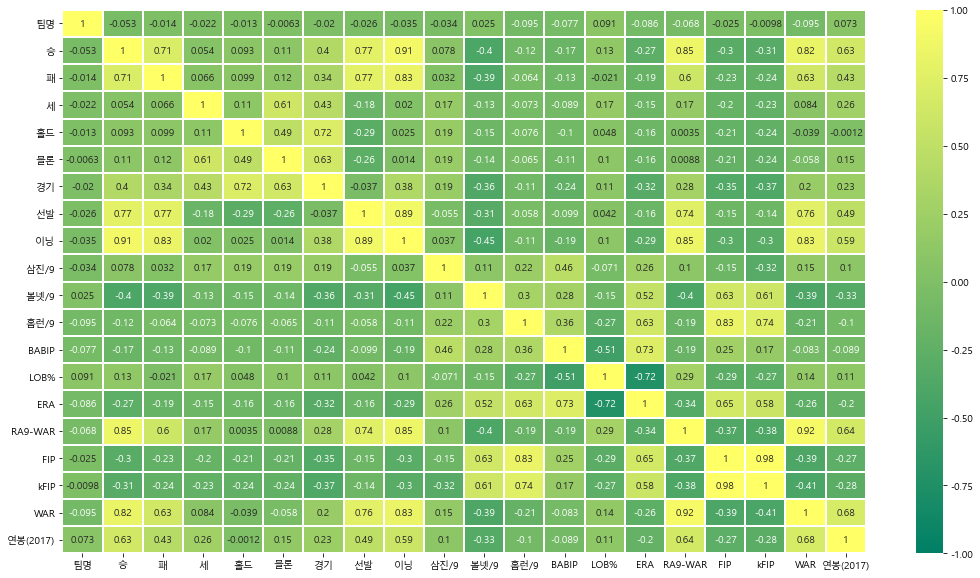

In [9]:
# heatmap 그리기
plt.figure(figsize=(18,10))
sns.heatmap(x_data.corr(),annot=True,linewidth=0.2, cmap='summer', 
            vmin=-1,vmax=1)
plt.show()

In [10]:
# 다중공선성 컬럼 확인
vif = pd.DataFrame()
vif['VIF_Factor']= [ variance_inflation_factor(x_data.values, i ) for i in range(x_data.shape[1]) ]
vif['features'] = x_data.columns
vif

,VIF_Factor,features
0,3.870879,팀명
1,13.020695,승
2,10.614883,패
3,3.306571,세
4,4.846939,홀드
5,3.582084,블론
6,44.054165,경기
7,50.464996,선발
8,138.519634,이닝
9,565.198309,삼진/9


In [11]:
# VIF_Factor >= 100 이상 컬럼 제거함
vif_100 = vif.query('VIF_Factor >= 100')
display(vif_100)

x_data_vif = x_data.drop(['이닝','삼진/9','볼넷/9','홈런/9','FIP', 'kFIP'], axis=1)
x_data_vif

,VIF_Factor,features
8,138.519634,이닝
9,565.198309,삼진/9
10,122.773415,볼넷/9
11,600.340097,홈런/9
16,101632.023208,FIP
17,69877.012701,kFIP


,팀명,승,패,세,홀드,블론,경기,선발,BABIP,LOB%,ERA,RA9-WAR,WAR,연봉(2017)
선수명,,,,,,,,,,,,,,
켈리,4,16,7,0,0,0,30,30,0.342,73.7,3.60,6.91,6.62,85000
소사,2,11,11,1,0,0,30,29,0.319,67.1,3.88,6.80,6.08,50000
양현종,0,20,6,0,0,0,31,31,0.332,72.1,3.44,6.54,5.64,150000
차우찬,2,10,7,0,0,0,28,28,0.298,75.0,3.43,6.11,4.63,100000
레일리,6,13,7,0,0,0,30,30,0.323,74.1,3.80,6.13,4.38,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
장민재,8,2,5,0,0,2,33,5,0.355,56.9,7.76,-1.21,-0.47,8100
정용운,0,3,2,0,0,0,25,11,0.263,65.4,5.92,0.39,-0.49,3100
노경은,6,0,2,0,0,0,9,2,0.382,52.8,11.66,-0.83,-0.61,16000


In [12]:
# 컬럼제거 후 다시 train, test 데이터 생성
x_train, x_test, y_train, y_test = train_test_split(x_data_vif, y_data, test_size=0.2,random_state=1)

In [13]:
# SGDRegressor() 실행됨
model = make_pipeline(StandardScaler(), SGDRegressor())
model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [14]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9297840761502381
0.7632254687290962


In [15]:
# cross validation score
r2_scores = cross_val_score(model,x_train,y_train,cv=5,scoring='r2',verbose=1)
print('r2_score : ',r2_scores.mean())

r2_score :  0.8295679798641735


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


## 문제3) Lasso 모델을 이용하여 r2 점수(train, test )를 출력하시요.

In [16]:
# gridSeach로 최적의 파라메터 찾기
model_lasso = Pipeline( [('scl', StandardScaler()), ('clf', Lasso()) ])
param_value = {'clf__alpha' : [0.001, 0.01, 0, 1,2,3,4]}

gridSearch = GridSearchCV(model_lasso, param_grid=param_value, cv=5, scoring = 'r2')
gridSearch.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('clf', Lasso())]),
             param_grid={'clf__alpha': [0.001, 0.01, 0, 1, 2, 3, 4]},
             scoring='r2')

In [17]:
print('train score : ', gridSearch.score(x_train,y_train))
print('test score :', gridSearch.score(x_test,y_test))
print('r2 score : ', gridSearch.best_score_)

train score :  0.932531532482744
test score : 0.6794794038826851
r2 score :  0.8149775642726581


## 문제 4) 선수별 2018년 연봉 top5 랭킹

In [18]:
df = pd.read_csv('data4/프로야구.csv')
top5 = df.nlargest(5,'연봉(2018)' )[['선수명','팀명','연봉(2018)']]
top5

,선수명,팀명,연봉(2018)
2,양현종,KIA,230000
0,켈리,SK,140000
1,소사,LG,120000
20,정우람,한화,120000
4,레일리,롯데,111000


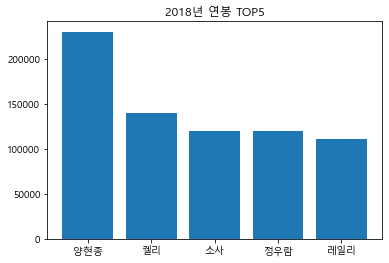

In [19]:
# 시각화
plt.bar(top5['선수명'], top5['연봉(2018)'])
plt.title('2018년 연봉 TOP5')
plt.show()

## 문제 5) 팀별 평균 연봉 구하고 그래프로 그리기

In [20]:
df2 = df[['팀명', '연봉(2018)']]
team_mean_salary = df2.groupby('팀명').mean()
team_mean_salary

,연봉(2018)
팀명,
KIA,29440.000000
KT,10184.210526
LG,23444.444444
NC,11353.846154
SK,17255.555556
두산,17980.000000
롯데,26707.142857
삼성,14220.000000
한화,21720.000000


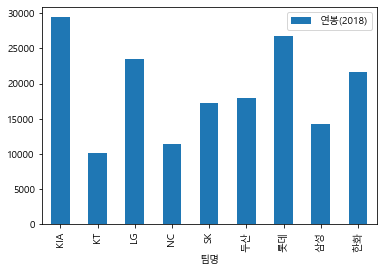

In [21]:
# 시각화
team_mean_salary.plot.bar()
plt.show()

## 문제 6) 2017년 연봉 대비 2018년 연봉이 가장 많이 오른 선수 탑5

In [22]:
df['연봉증감액'] = df['연봉(2018)'] - df['연봉(2017)']
df.nlargest(5,'연봉증감액')[['선수명','팀명','연봉(2018)','연봉(2017)','연봉증감액']]

,선수명,팀명,연봉(2018),연봉(2017),연봉증감액
2,양현종,KIA,230000,150000,80000
1,소사,LG,120000,50000,70000
0,켈리,SK,140000,85000,55000
5,피어밴드,KT,85000,35000,50000
4,레일리,롯데,111000,85000,26000
